## MACD : Some few line codes to implement MACD with Morgan Stanley Stocks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

In [3]:
data=yf.download("MS", start="2020-01-01", end="2021-11-04")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,50.959999,51.130001,50.740002,51.119999,48.471249,5131600
2020-01-02,51.200001,52.060001,51.169998,52.040001,49.343586,7808000
2020-01-03,51.220001,51.450001,50.830002,51.200001,48.547100,6706000
2020-01-06,50.669998,51.040001,50.459999,51.020000,48.376431,7476700
2020-01-07,51.040001,51.189999,50.709999,50.919998,48.281605,4538100
...,...,...,...,...,...,...
2021-10-28,101.889999,102.629997,100.800003,102.500000,102.500000,6663000
2021-10-29,102.110001,103.309998,101.930000,102.779999,102.779999,8056900
2021-11-01,103.889999,104.330002,102.690002,104.000000,104.000000,5432400


In [4]:
sma_short=30
sma_long=100
def SMA(data, window, column):
    return data[column].rolling(window=window).mean()

data["SMA30"]=SMA(data, window=sma_short, column="Close")
data["SMA100"]=SMA(data, window=sma_long, column="Close")


In [5]:
def buy_sell(data):
    buy_signal_price = []
    sell_signal_price = []
    flag = 0
    
    for i in range(len(data)):
        if data["SMA30"][i]>data["SMA100"][i]:
            if flag!=1:
                buy_signal_price.append(data["Close"][i])
                sell_signal_price.append(np.nan)
                flag = 1
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
        elif data["SMA30"][i]<data["SMA100"][i]:
            if flag !=-1:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(data["Close"][i])
                flag = -1
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
        else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                    
    return(buy_signal_price, buy_signal_price)              

In [6]:
buy_sell=buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

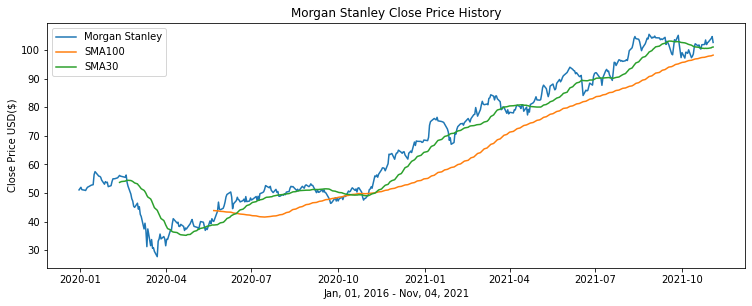

In [7]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data["Close"],label="Morgan Stanley")
plt.plot(data["SMA100"], label="SMA100")
plt.plot(data["SMA30"],label="SMA30")
plt.title("Morgan Stanley Close Price History")
plt.xlabel("Jan, 01, 2016 - Nov, 04, 2021")
plt.ylabel("Close Price USD($)")
plt.legend(loc="upper left")
plt.show()

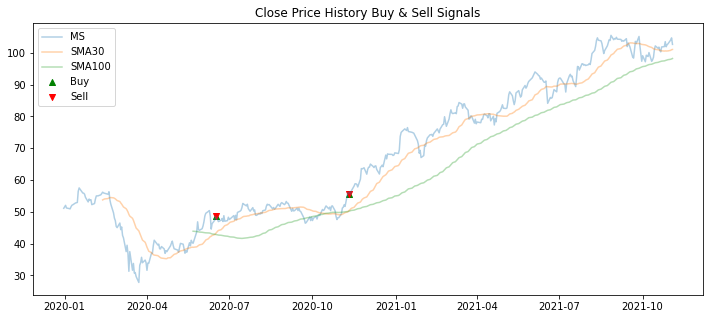

In [8]:
plt.figure(figsize=(12,5))
plt.plot(data["Close"],label="MS",alpha=0.35)
plt.plot(data["SMA30"], label="SMA30",alpha=0.35)
plt.plot(data["SMA100"], label="SMA100",alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label="Buy", marker="^", color="green")
plt.scatter(data.index, data['Sell_Signal_Price'], label="Sell", marker="v", color="red")
plt.title('Close Price History Buy & Sell Signals')
plt.legend(loc="upper left")
